# 1.Packages & Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 나눔고딕 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

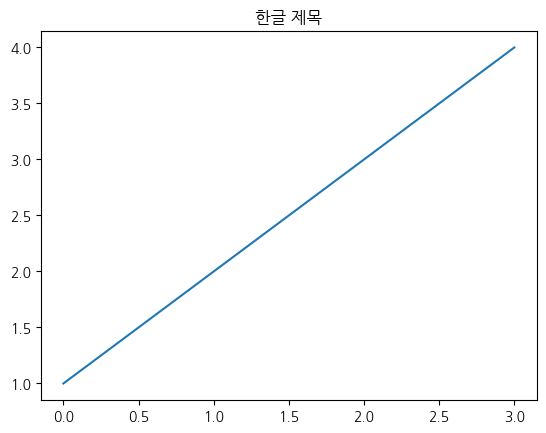

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 나눔고딕 볼드체 폰트 경로
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 나눔고딕 볼드체 폰트 등록
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 시각화 코드
plt.plot([1, 2, 3, 4])
plt.title('한글 제목')
plt.show()

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM

import warnings
warnings.filterwarnings("ignore")

In [4]:
%cd /content/drive/MyDrive/Machine Learning project/Data

/content/drive/MyDrive/Machine Learning project/Data


In [7]:
data = pd.read_csv('7.uci-secom.csv')
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [8]:
# 데이터의 모양 알아보기
data.shape

(1567, 592)

In [9]:
# 컬럼별 데이터 타입 알아보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [10]:
# 컬럼별 간단한 통계값 보기
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [12]:
data.isnull().any().any()

True

In [13]:
# 중복된 항목 수 알아보기
print("중복된 항목 수 :", len(data[data.duplicated()]))

중복된 항목 수 : 0


In [14]:
# 결측값 채우기
# NaN 을 0으로 채우기
data = data.replace(np.NaN, 0)

# 결측값 확인
data.isnull().any().any()

False

# 2.Target Feature

In [15]:
data['Pass/Fail'].unique()

array([-1,  1])

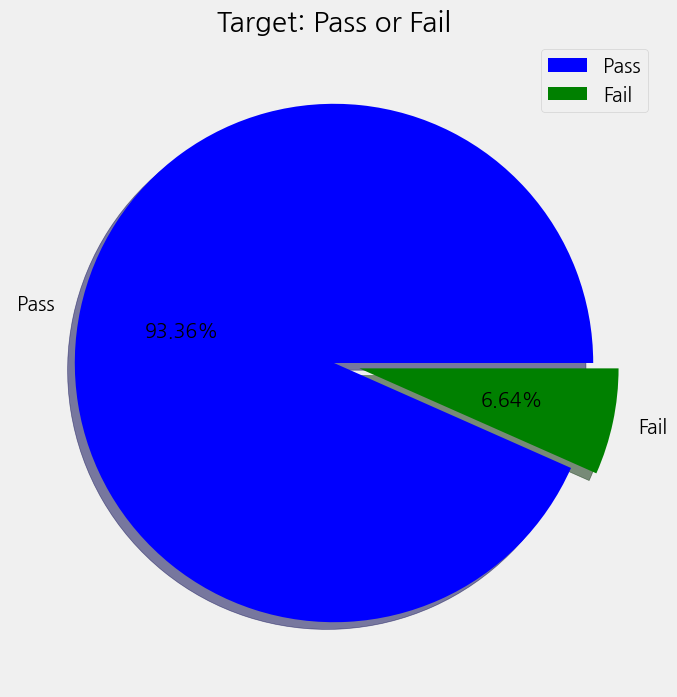

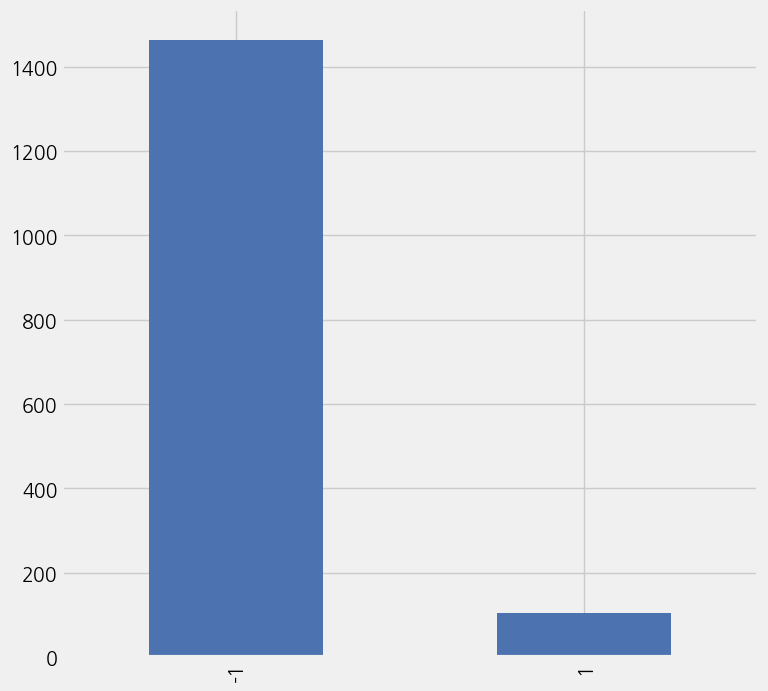

In [16]:
labels = ['Pass', 'Fail']
size = data['Pass/Fail'].value_counts()
colors = ['blue', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()
data['Pass/Fail'].value_counts().plot(kind="bar");

- 매우 불균형한 데이터

## 2.1 분포, 상관관계 확인

In [17]:
# 각 센서별 Target Feature 분포
unique_vals = data['Pass/Fail'].unique()
targets = [data.loc[data['Pass/Fail'] == val] for val in unique_vals]

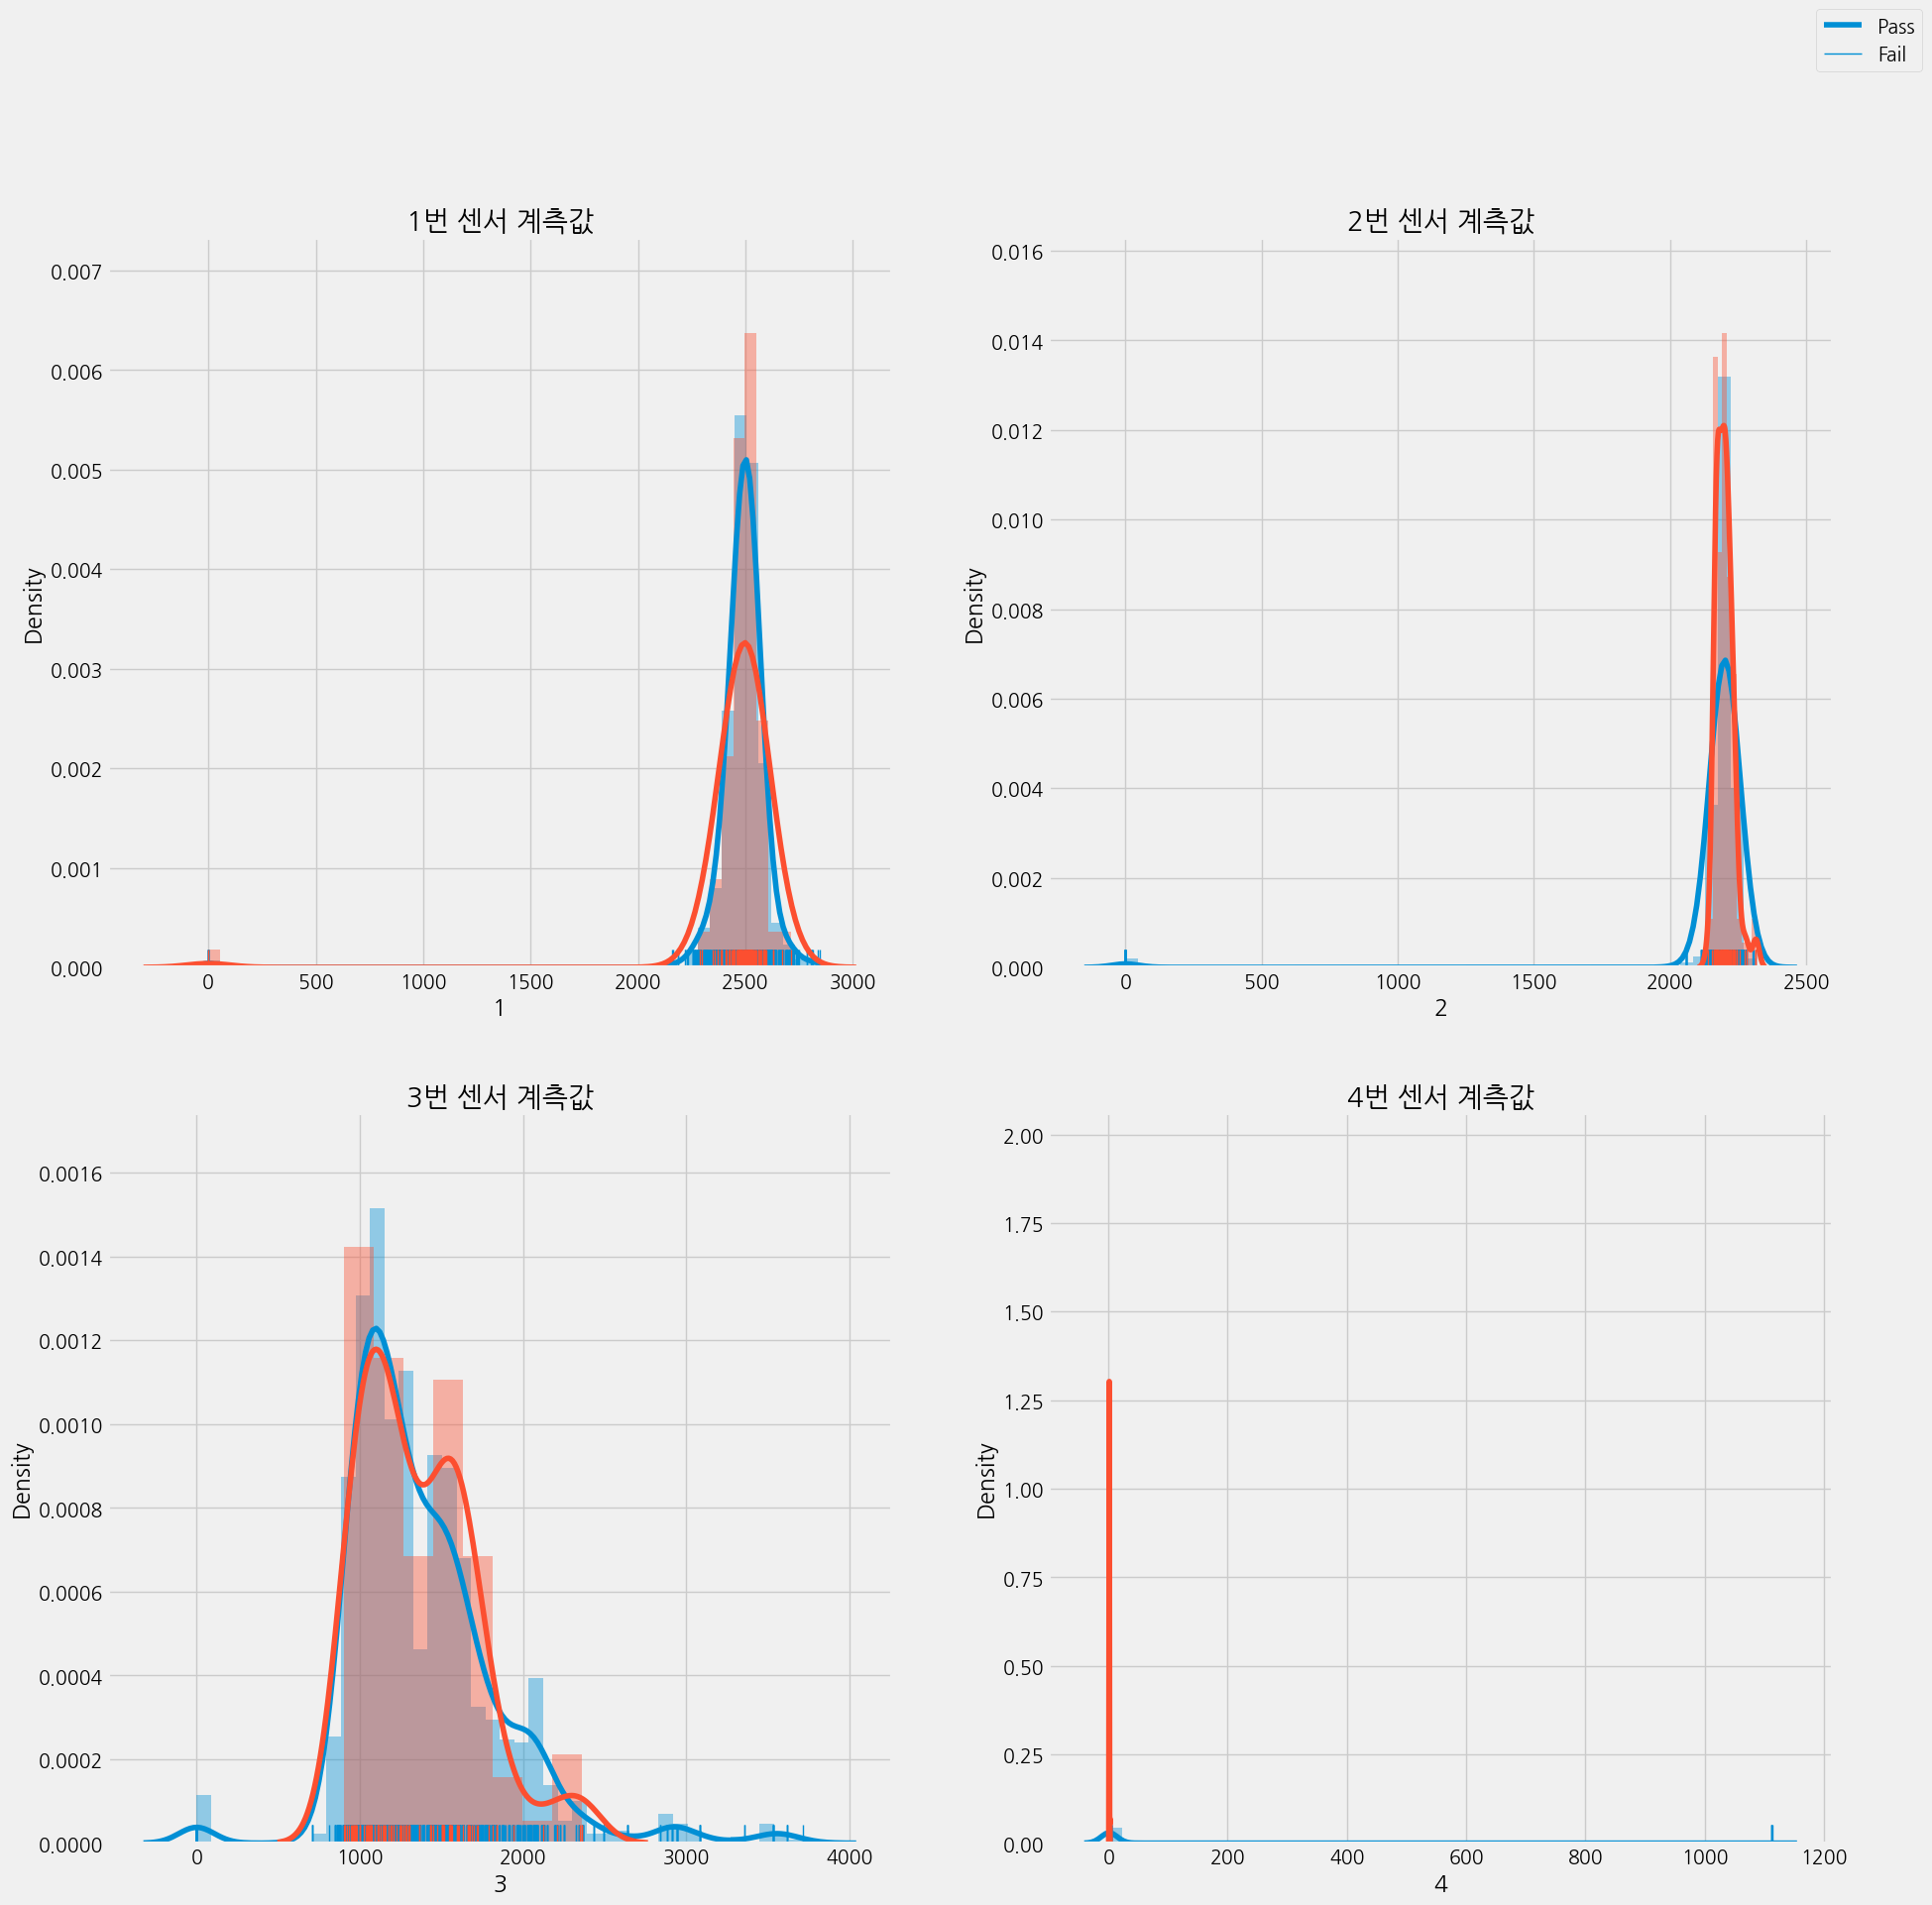

In [20]:
fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
for target in targets:
    sns.distplot(target['1'], hist=True, rug=True)
plt.title('1번 센서 계측값', fontsize = 20)

plt.subplot(2, 2, 2)
for target in targets:
    sns.distplot(target['2'], hist=True, rug=True)
plt.title('2번 센서 계측값', fontsize = 20)

plt.subplot(2, 2, 3)
for target in targets:
    sns.distplot(target['3'], hist=True, rug=True)
plt.title('3번 센서 계측값', fontsize = 20)

plt.subplot(2, 2, 4)
for target in targets:
    sns.distplot(target['4'], hist=True, rug=True)
plt.title('4번 센서 계측값', fontsize = 20)

#sns.add_legend()
#plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

Text(0.5, 1.0, '상관 히트맵')

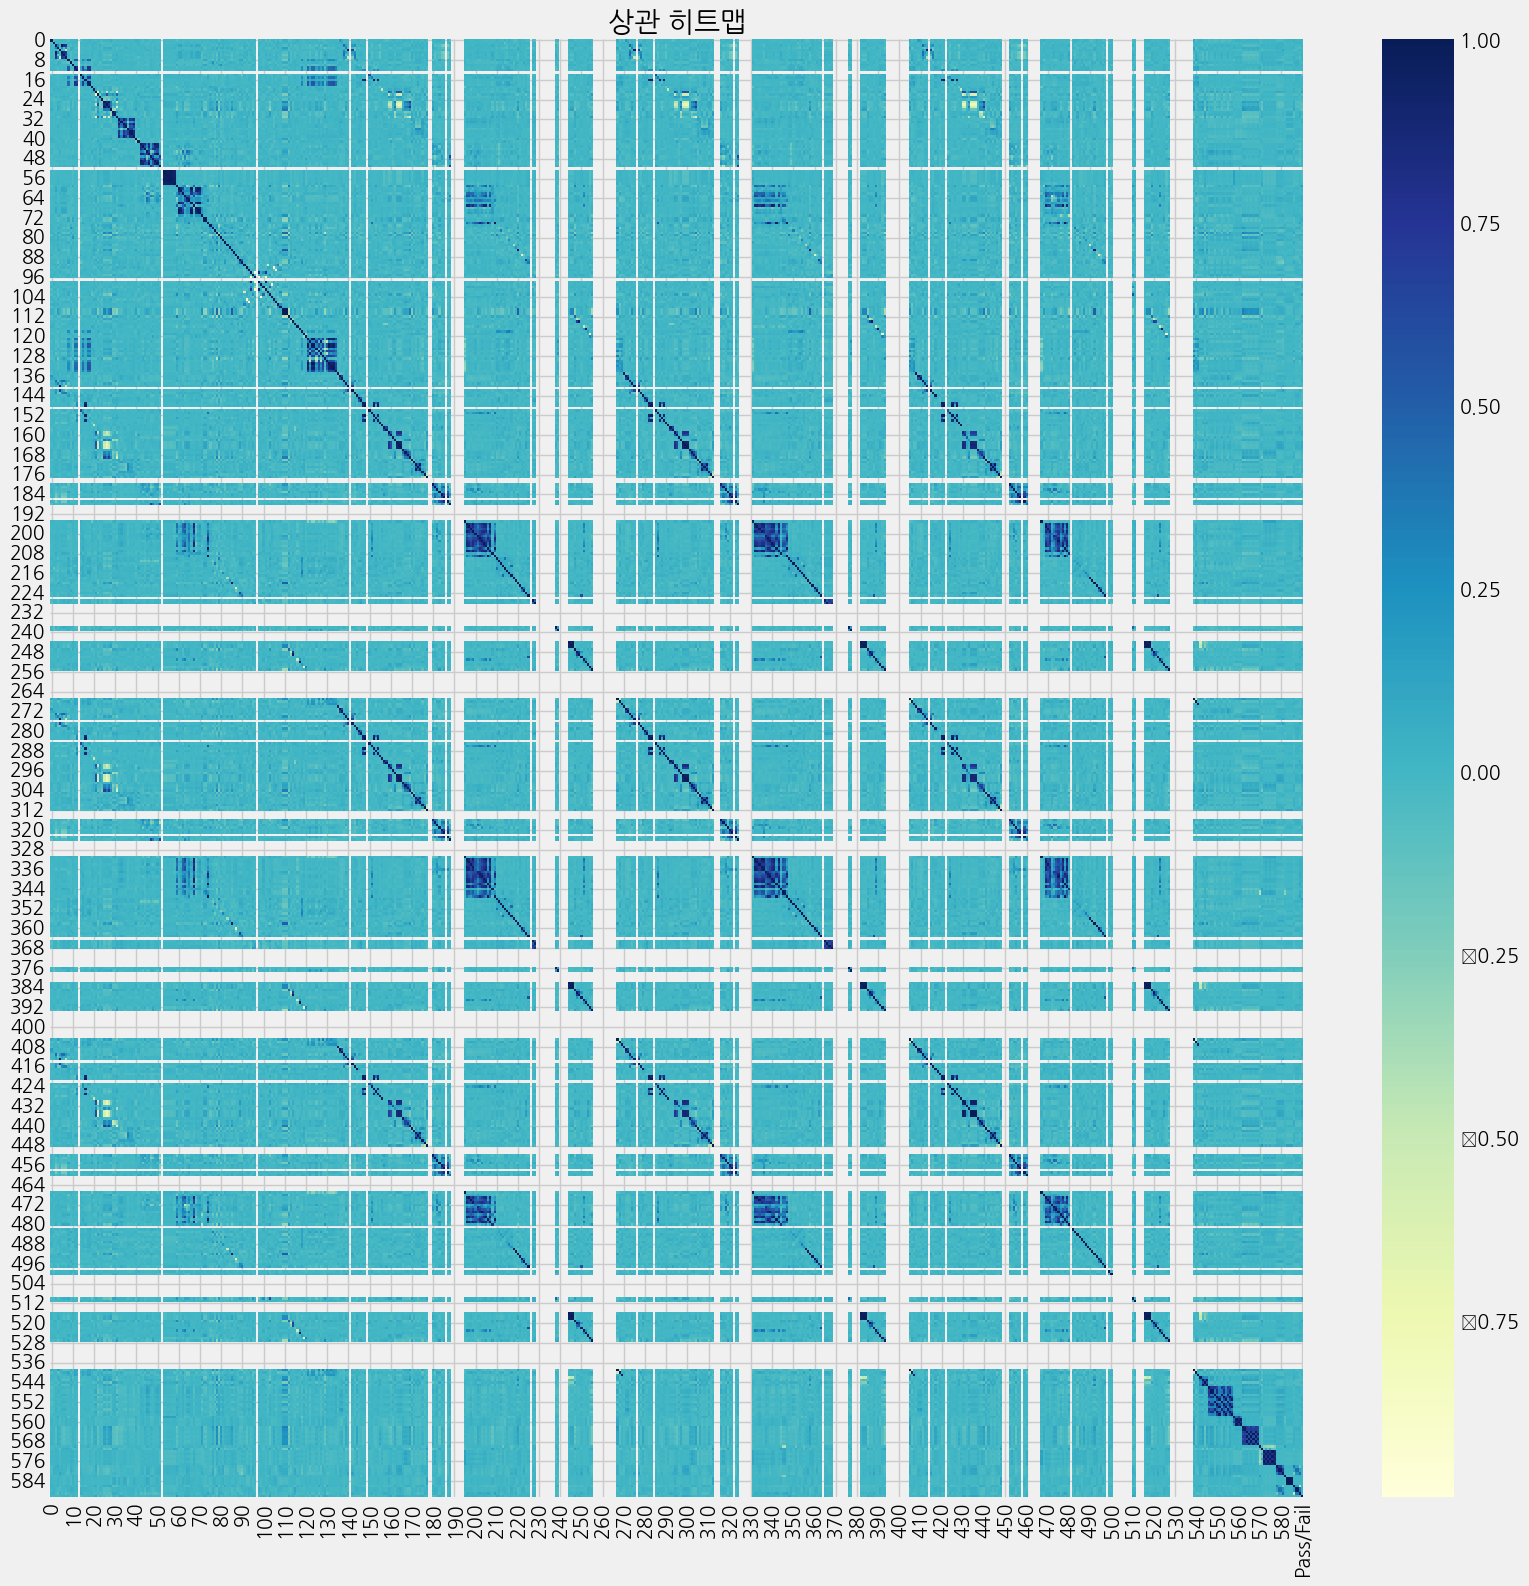

In [21]:
# 상관성 확인
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = "YlGnBu")
plt.title('상관 히트맵', fontsize = 20);

In [22]:
# 상관계수 구하기
data.corr()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,-0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,-0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.026117,0.002246,-0.067263,-0.016895,0.004106,...,0.431632,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,-0.002472


In [23]:
def remove_collinear_features(x, threshold):
    # 데이터프레임 x 의 상관계수 구하기
    corr_matrix = x.corr()
    # Pass / Fail 을 제외한 컬럼수
    iters = range(len(corr_matrix.columns) - 1)
    # 제거할 컬럼들 저장할 리스트
    drop_cols = []

    for i in iters:
        for j in range(i+1):

            # j행 (i+1)열 상관계수 가져오기
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            # 상관계수 셀의 컬럼명 가져오기
            col = item.columns
            # 상관계수 셀의 행 인덱스 가져오기
            row = item.index
            # 상관계수의 절대값
            val = abs(item.values)

            if val >= threshold:
                print(col.values[0], "열", row.values[0], "행의 상관계수 : ", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [24]:
threshold = 0.70
data = remove_collinear_features(data,threshold)

5 열 2 행의 상관계수 :  0.99
6 열 2 행의 상관계수 :  0.82
6 열 5 행의 상관계수 :  0.84
7 열 2 행의 상관계수 :  0.75
7 열 5 행의 상관계수 :  0.77
12 열 11 행의 상관계수 :  0.83
17 열 11 행의 상관계수 :  0.81
18 열 11 행의 상관계수 :  0.72
18 열 12 행의 상관계수 :  0.79
18 열 17 행의 상관계수 :  0.9
22 열 21 행의 상관계수 :  0.75
26 열 25 행의 상관계수 :  0.83
27 열 25 행의 상관계수 :  0.98
27 열 26 행의 상관계수 :  0.79
30 열 29 행의 상관계수 :  0.86
34 열 32 행의 상관계수 :  0.88
35 열 34 행의 상관계수 :  0.83
37 열 32 행의 상관계수 :  0.75
37 열 34 행의 상관계수 :  0.75
38 열 32 행의 상관계수 :  0.72
38 열 34 행의 상관계수 :  0.72
38 열 36 행의 상관계수 :  0.71
38 열 37 행의 상관계수 :  0.97
39 열 32 행의 상관계수 :  0.81
39 열 34 행의 상관계수 :  0.91
39 열 35 행의 상관계수 :  0.71
39 열 37 행의 상관계수 :  0.86
39 열 38 행의 상관계수 :  0.84
43 열 42 행의 상관계수 :  0.82
44 열 42 행의 상관계수 :  0.82
46 열 42 행의 상관계수 :  0.84
46 열 43 행의 상관계수 :  0.84
46 열 45 행의 상관계수 :  0.74
48 열 44 행의 상관계수 :  0.77
49 열 42 행의 상관계수 :  1.0
49 열 43 행의 상관계수 :  0.82
49 열 44 행의 상관계수 :  0.82
49 열 46 행의 상관계수 :  0.84
50 열 42 행의 상관계수 :  0.88
50 열 43 행의 상관계수 :  0.9
50 열 46 행의 상관계수 :  0.97
50 열 49 행의 상관계수 :  0.88
51 열 

In [25]:
# Time 컬럼 삭제
data = data.drop(columns = ['Time'], axis = 1)

In [26]:
data.shape

(1567, 307)

In [27]:
data.head()

,0,1,2,3,4,8,9,10,11,13,...,570,571,572,578,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,0.0,...,533.8500,2.1113,8.95,0.0000,0.5005,0.0118,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,1.4966,-0.0005,-0.0148,0.9627,0.0,...,535.0164,2.4335,5.92,0.0096,0.5019,0.0223,0.0096,0.0201,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,0.0,...,535.0245,2.0293,11.21,0.0584,0.4958,0.0157,0.0584,0.0484,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,1.4882,-0.0124,-0.0033,0.9629,0.0,...,530.5682,2.0253,9.33,0.0202,0.4990,0.0103,0.0202,0.0149,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,1.5031,-0.0031,-0.0072,0.9569,0.0,...,532.0155,2.0275,8.83,0.0000,0.4800,0.4766,0.0202,0.0149,73.8432,-1


## 2.2 UnderSampling

In [28]:
# 실패
failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [29]:
# 통과
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [30]:
# Pass 라벨(값이 1)에서 랜덤으로 104개 가져오기
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [31]:
# 같은 비율로 합친 Pass/Fail 데이터 생성
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [32]:
undersample_data = data.iloc[under_sample, :]

In [33]:
x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail']
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 306)
(208, 1)


In [34]:
# 언더샘플링 데이터 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 306)
(145, 1)
(63, 306)
(63, 1)


In [35]:
# StandardScaler 적용
sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

## 2.3 OverSampling

In [36]:
# SMOTE 적용
x_resample, y_resample  = SMOTE(random_state=1).fit_resample(x, y.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(228, 306)
(228,)


In [37]:
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_os.shape)
print(y_train_os.shape)
print(x_test_os.shape)
print(y_test_os.shape)

(145, 306)
(145, 1)
(63, 306)
(63, 1)


In [38]:
# standardScale 적용
sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

# 3.Modeling

## 3.1 데이터 분리

In [95]:
# standardScale 적용
sc = StandardScaler()
x_train_os = data.iloc[:,:(data.shape[1]-1)]
y = data["Pass/Fail"]
y = y.replace(-1, 0)


print("shape of x:", x.shape)
print("shape of y:", y.shape)
sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

shape of x: (1567, 306)
shape of y: (1567,)


In [96]:
# 훈련/테스트 데이터 세트 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 306)
shape of x_test:  (471, 306)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [97]:
y_train.unique()

array([0, 1])

## 3.2 Scaling

In [98]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 선언
sc = StandardScaler()
# StandardScaler 에 fit_transform
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 3.3 Models-OverSampling

### 3.3.1 XGBoost

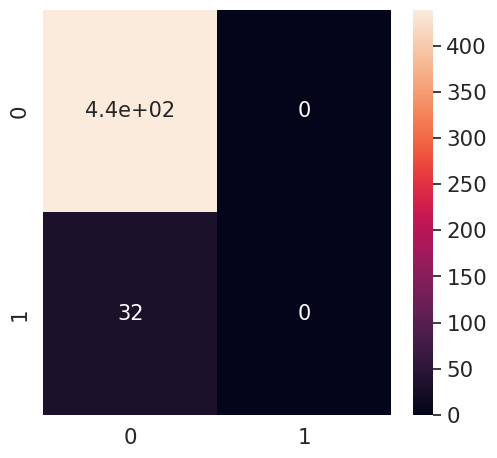

In [99]:
# XGB Classifier
xg = XGBClassifier(random_state=1)
xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})
plt.show()

In [46]:
print("Accuracy: ", xg.score(x_test,y_test)*100)

Accuracy:  93.20594479830149


In [100]:
# Grid Search
model = XGBClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# 모델에 대한 매개변수 정의
parameters = [{'max_depth': [1, 2, 3, 4, 5, 6],
               'random_state': [1]}]

# 올바른 cv 매개변수로 GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# 데이터에 grid search를 적용
grid_search = grid_search.fit(x_train, y_train)

# 최고 정확도 및 최적 매개변수 검색
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.9343088418430885
Best Parameter:  {'max_depth': 5, 'random_state': 1}


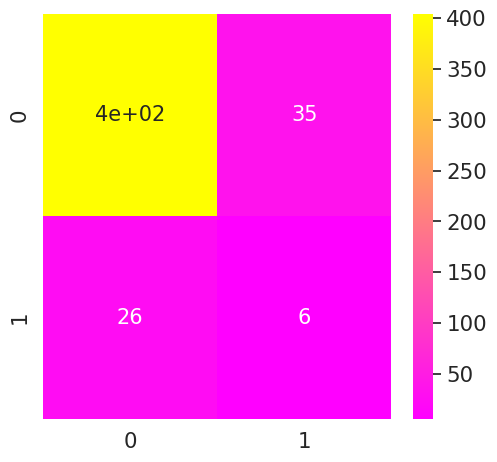

In [102]:
# 가중치 계산
weights = (y == 0).sum() / (1.0 * (y == 1).sum())

# weights가 Series 객체인 경우, float 값으로 변환
if isinstance(weights, pd.Series):
    weights = weights.values[0]

# XGBClassifier 생성
model = XGBClassifier(max_depth=1, scale_pos_weight=weights, n_jobs=4, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, cmap = 'spring');

In [103]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  87.04883227176221


### 3.3.2 RandomForest

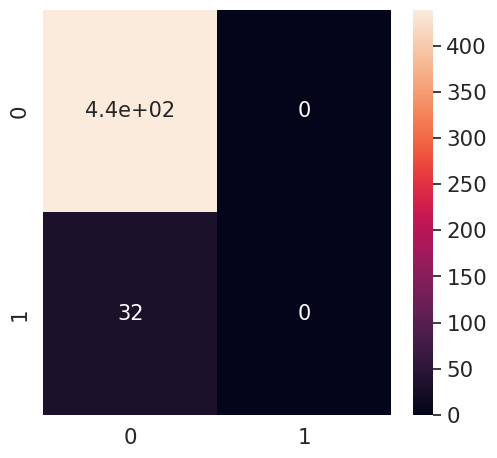

In [47]:
# RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})
plt.show()

In [48]:
print("Accuracy: ", rf.score(x_test,y_test)*100)

Accuracy:  93.20594479830149


In [105]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  93.20594479830149


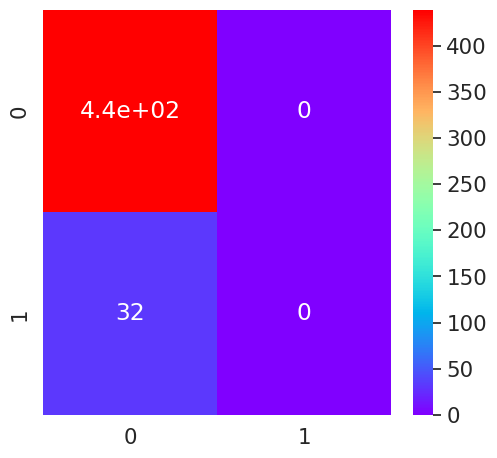

In [107]:
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow');

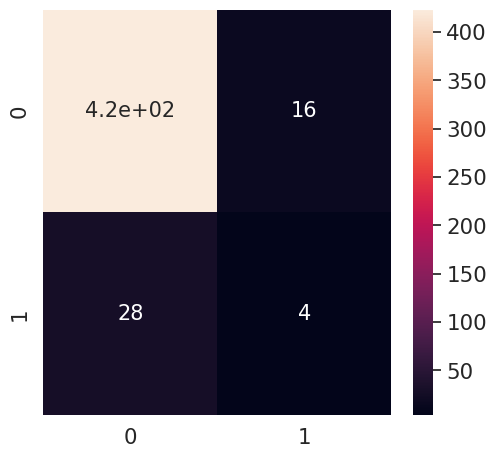

In [49]:
# Logistic Regression
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

In [50]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  90.65817409766454


### 3.3.3 Logistic Regression

Accuracy:  90.65817409766454


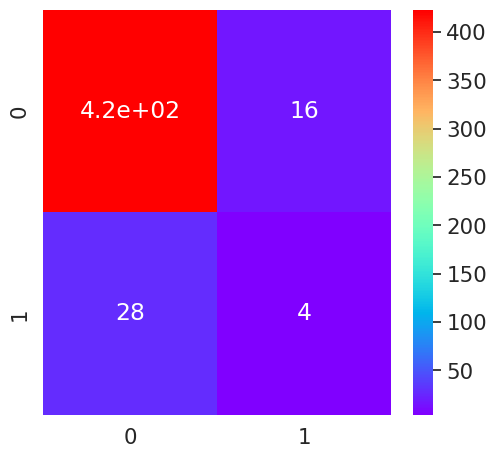

In [109]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy: ", lr.score(x_test,y_test)*100)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow');

## 3.4 Models-UnderSampling

### 3.4.1 XGBoost

In [54]:
# Target 변수 0,1
y_train_us = y_train_us.replace(-1,0)
y_test_us = y_test_us.replace(-1,0)

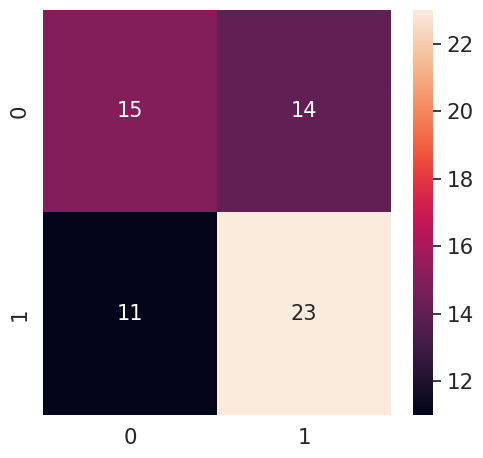

In [65]:
model = XGBClassifier(random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})
plt.show()

In [66]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  47.5583864118896


In [67]:
# Grid Search
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'cv' : [2,4,6,8,10],
              'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [68]:
print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

Best Accuracy:  67.58620689655173
Best Parameter:  {'cv': 2, 'max_depth': 2, 'random_state': 1}


In [69]:
# scale_pos_weights 사용
weights = (y == 0).sum()/(1.0*(y == -1).sum())

model = XGBClassifier(max_depth = 3, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

In [70]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  44.161358811040344


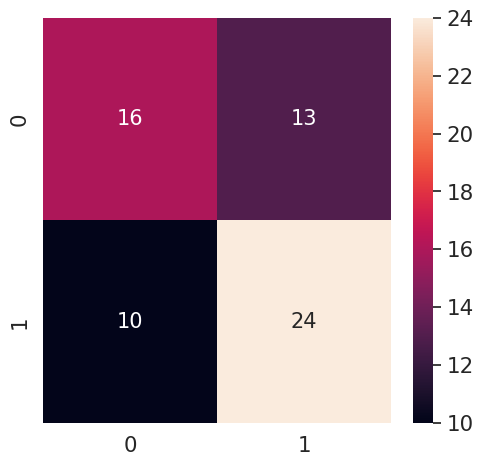

In [72]:
cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

### 3.4.2 Random Forest

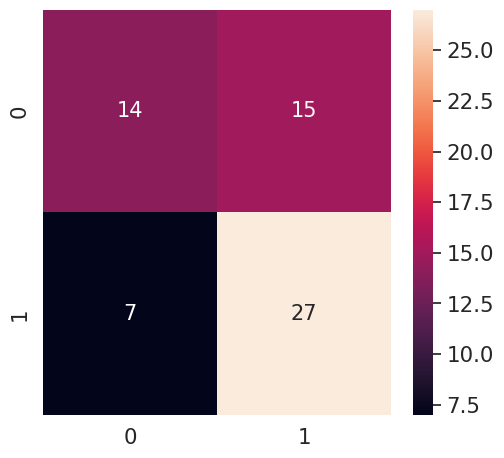

In [73]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

In [74]:
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  37.57961783439491


### 3.4.3 Logistic Regression

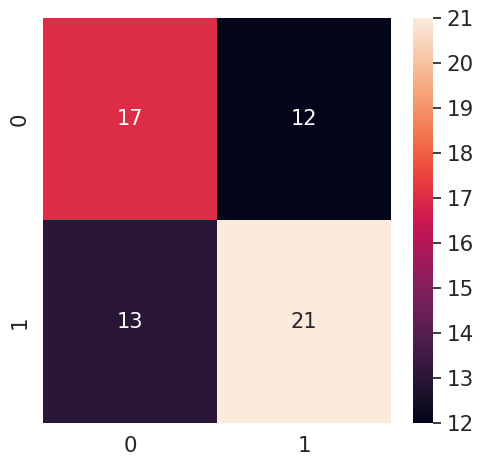

In [75]:
# Logistic Regression
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us)

y_pred = lr.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

In [76]:
print("Accuracy: ", lr.score(x_test,y_test)*100)

Accuracy:  47.983014861995755


## 3.5 PCA

In [128]:
data.shape

(1567, 307)

In [130]:
from scipy.stats import zscore
data_new=data.iloc[:,:306].apply(zscore)
data_new.head()

,0,1,2,3,4,8,9,10,11,13,...,565,570,571,572,578,582,583,586,587,589
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.436850,1.128343,-0.381523,-0.481360,NaN,...,-1.305710,0.190142,0.034410,-0.226018,-0.662093,0.055275,-0.204269,-1.734706,-1.868461,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.393723,0.022511,-1.608226,-0.011526,NaN,...,-1.305710,0.256816,1.205944,-0.261137,0.083539,0.162312,0.407145,-0.958144,0.412587,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,-0.192349,0.327111,0.124224,-0.044305,NaN,...,5.447531,0.257279,-0.263745,-0.199823,3.873831,-0.304064,0.022827,2.989383,3.624211,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.300837,-0.765478,-0.370762,-0.006063,NaN,...,0.464315,0.002548,-0.278290,-0.221613,0.906840,-0.059408,-0.291614,-0.100689,-0.177535,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.465600,-0.149655,-0.790424,-0.169959,NaN,...,-1.305710,0.085279,-0.270290,-0.227409,-0.662093,-1.512057,26.860983,-0.100689,-0.177535,-0.274469


In [131]:
data_new.isnull().any().any()

True

In [132]:
data_new = data_new.replace(np.NaN, 0)

In [133]:
data_new.isnull().any().any()

False

In [134]:
x = data_new.iloc[:,:306]
y = data["Pass/Fail"]

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 306)
shape of y: (1567,)


### 3.5.1 Covariance Matrix

In [135]:
cov_matrix = np.cov(x.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00063857 -0.04781282  0.00759455 ...  0.04477373  0.00523674
   0.02150242]
 [-0.04781282  1.00063857 -0.03046719 ... -0.00922529  0.03950455
   0.04449214]
 [ 0.00759455 -0.03046719  1.00063857 ...  0.01574304 -0.00709495
  -0.03045388]
 ...
 [ 0.04477373 -0.00922529  0.01574304 ...  1.00063857  0.16974222
  -0.48505059]
 [ 0.00523674  0.03950455 -0.00709495 ...  0.16974222  1.00063857
   0.39175294]
 [ 0.02150242  0.04449214 -0.03045388 ... -0.48505059  0.39175294
   1.00063857]]


### 3.5.2 Eigen Values, Eigen Vector

In [136]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.0253695   0.008654   -0.00303277 ...  0.          0.
   0.        ]
 [-0.0025788  -0.00538507 -0.03440905 ...  0.          0.
   0.        ]
 [ 0.02753407 -0.00681287 -0.01400105 ...  0.          0.
   0.        ]
 ...
 [-0.048536    0.05395333 -0.04823939 ...  0.          0.
   0.        ]
 [ 0.01242541 -0.02265625  0.00838096 ...  0.          0.
   0.        ]
 [ 0.0256921  -0.06086426  0.04287574 ...  0.          0.
   0.        ]]

 Eigen Values 
 [7.98315826 4.02662836 3.83340365 3.77872193 3.24842052 3.04338189
 2.81987221 2.70184859 2.63844411 2.49433697 2.39544185 2.33496444
 2.2688959  2.21004546 2.11987395 2.18253643 2.06331064 2.02389709
 2.01071359 1.99863763 1.98267329 1.95915582 1.92095551 1.8898469
 1.85708597 1.83222209 1.79047783 1.77162466 1.74830769 1.69223045
 1.6721054  1.59353955 1.61120278 1.64351825 1.63509768 1.58746461
 1.54878319 1.54342972 1.51376615 1.4987913  1.39927034 1.42330375
 1.46908609 1.45916185 1.45031371 1.37348926 1.36548073

In [137]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("누적 분산 설명력", cum_var_exp)

누적 분산 설명력 [  4.11240397   6.18666104   8.16138131  10.10793312  11.78130812
  13.34906055  14.80167533  16.19349202  17.55264684  18.83756703
  20.07154289  21.27436472  22.44315234  23.58162404  24.70592487
  25.79794607  26.86082953  27.90340969  28.93919857  29.96876671
  30.99011105  31.99934072  32.98889207  33.96241829  34.91906821
  35.86290988  36.78524762  37.69787343  38.59848786  39.47021494
  40.3315749   41.17820862  42.02050462  42.85049151  43.67137946
  44.48913799  45.28697037  46.08204499  46.86183886  47.63391867
  48.39069629  49.14236158  49.88946889  50.62266242  51.3434755
  52.05100785  52.75441472  53.44575446  54.13150394  54.80518611
  55.47224219  56.13386282  56.78335336  57.43035818  58.06247379
  58.68657041  59.30627663  59.91402001  60.51888826  61.11881541
  61.71313647  62.30277087  62.88054936  63.45680398  64.02642122
  64.58794689  65.14526769  65.69372362  66.23286709  66.7660594
  67.29318433  67.81743689  68.33600263  68.84838165  69.35881173
  

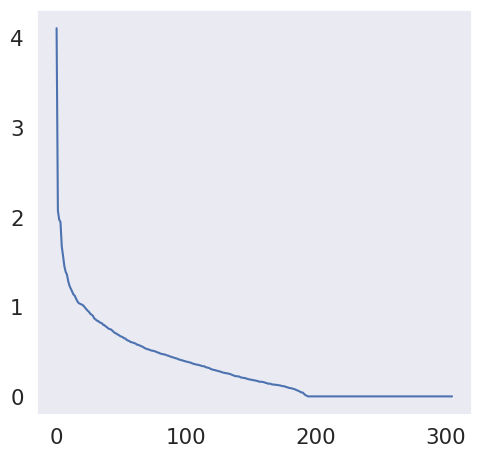

In [138]:
plt.plot(var_exp);

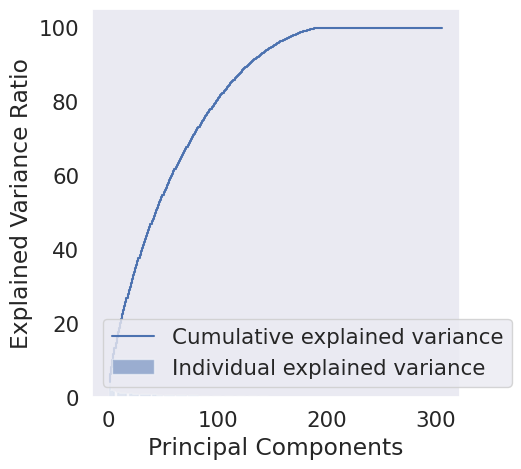

In [139]:
# Explained Variance Ratio : 각각의 주성분 벡터가 이루는 축에 투영(projection)한 결과의 분산의 비율 (=각 eigenvalue 의 비율)

# Ploting plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [140]:
len(cum_var_exp)

306

### 3.5.3 Sklearn PCA

In [141]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

pca = PCA(n_components=130)
data_reduced = pca.fit_transform(x)
data_reduced.transpose()

array([[ 3.26184338,  1.81271849,  2.21584591, ..., -5.38607964,
        -4.57167442, -5.28922259],
       [ 0.08027317,  0.84616628,  0.26216941, ..., 34.89712581,
         4.06168166, 35.38535322],
       [-0.21081075, -0.95989522, -1.19312548, ...,  3.05884413,
         2.00042156,  5.14339467],
       ...,
       [ 0.37001628,  0.95820668,  1.01041549, ..., -1.29688522,
        -0.96947385, -0.6351546 ],
       [ 0.15483709,  0.74940681,  0.87138171, ..., -0.70944912,
         0.40830603, -0.74182013],
       [ 0.68489448, -0.12914212, -0.05351302, ..., -0.28180009,
        -0.1205025 ,  0.46287501]])

In [142]:
pca.components_

array([[-0.02536949, -0.0025788 ,  0.02753413, ..., -0.04853601,
         0.01242539,  0.02569209],
       [-0.00865411,  0.00538457,  0.00681419, ..., -0.05395415,
         0.02265641,  0.06086409],
       [-0.00303242, -0.03440791, -0.01400139, ..., -0.04824016,
         0.00837891,  0.04287721],
       ...,
       [-0.01840247, -0.02688465, -0.08103039, ..., -0.04065229,
        -0.0571992 ,  0.07858791],
       [-0.01570926,  0.0931059 ,  0.04414589, ...,  0.09934153,
         0.09808841, -0.02798684],
       [-0.04819952, -0.11554661, -0.0695719 , ..., -0.05050836,
         0.00563871,  0.00284611]])

In [143]:
df_comp = pd.DataFrame(pca.components_,columns=list(x))
df_comp.head()

,0,1,2,3,4,8,9,10,11,13,...,565,570,571,572,578,582,583,586,587,589
0,-0.025369,-0.002579,0.027534,-0.066608,-0.024699,0.077981,-0.031003,0.017991,-0.011328,1.497183e-19,...,-0.103563,-0.017317,0.095065,-0.020350,-0.006380,-0.012915,0.006665,-0.048536,0.012425,0.025692
1,-0.008654,0.005385,0.006814,0.043184,0.000092,-0.217424,0.002424,0.042957,-0.307618,7.505147e-20,...,0.013687,-0.015341,0.029586,0.013739,0.039335,0.006928,0.006353,-0.053954,0.022656,0.060864
2,-0.003032,-0.034408,-0.014001,-0.003739,-0.003487,-0.062299,-0.011085,-0.037442,-0.033601,3.085966e-18,...,-0.032971,-0.007391,-0.011182,-0.008241,-0.029702,-0.048940,0.013378,-0.048240,0.008379,0.042877
3,-0.011014,0.019493,0.031014,0.008150,0.037436,0.027088,-0.034176,0.030427,0.011602,5.352220e-18,...,0.042444,-0.031512,-0.018138,0.031904,0.048757,0.010022,0.018019,0.021472,-0.018802,-0.007800
4,-0.001615,-0.024106,-0.050001,-0.037776,-0.031002,0.003797,-0.003771,-0.000667,-0.092505,-7.819944e-18,...,-0.051721,-0.022408,0.033643,0.025759,-0.102886,-0.021625,-0.015483,0.035709,-0.088359,-0.083097


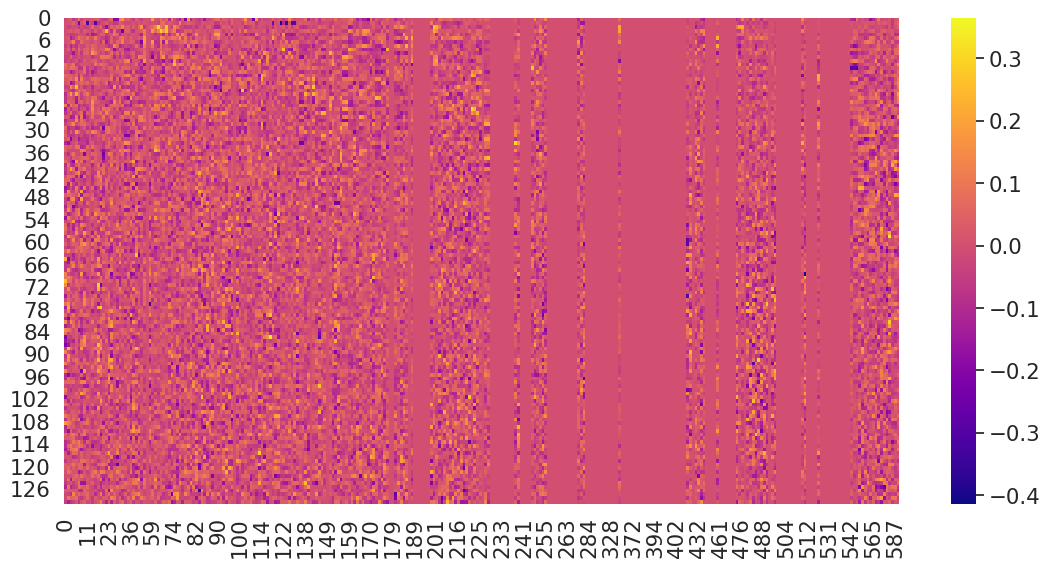

In [144]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',);

In [145]:
data_reduced.shape

(1567, 130)

In [146]:
df_red2 = pd.DataFrame(data_reduced)
df_red2.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,3.261843,0.080273,-0.210811,-0.872238,-0.618915,0.753695,-0.013372,-0.573354,-3.189378,1.888984,...,-0.215393,0.152497,-1.193766,-0.455669,0.602338,-0.131715,-0.054315,0.370016,0.154837,0.684894
1,1.812718,0.846166,-0.959895,-0.070734,0.165128,0.658436,-1.083637,0.301918,-2.559387,1.301926,...,-0.062640,-0.054126,-0.211309,1.284303,0.477447,-0.855843,1.009689,0.958207,0.749407,-0.129142
2,2.215846,0.262169,-1.193125,2.265637,-1.239299,-0.951614,2.023542,0.905482,-1.154585,-1.810835,...,1.044094,0.733088,0.417143,0.045459,-0.731790,-0.439767,1.356636,1.010415,0.871382,-0.053513
3,3.617125,0.816696,-0.817178,2.151559,-2.613586,-1.409285,1.174540,0.844594,-0.292810,-2.763435,...,-1.177636,-1.530375,-2.972819,0.251628,-2.246208,4.204352,-3.056178,-0.004410,-0.511948,2.017621
4,2.765993,0.133634,1.444608,2.270419,-1.497776,-0.624387,-2.928835,-1.895323,2.505940,1.486183,...,0.282069,0.684626,-0.544684,0.327203,-1.357161,1.122304,0.965251,-0.738955,0.155763,1.139154


In [147]:
df_red3 = df_red2.copy()
df_red4 = df_red3
df_red4["Pass/Fail"] = data["Pass/Fail"]

In [148]:
df_red4.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,Pass/Fail
0,3.261843,0.080273,-0.210811,-0.872238,-0.618915,0.753695,-0.013372,-0.573354,-3.189378,1.888984,...,0.152497,-1.193766,-0.455669,0.602338,-0.131715,-0.054315,0.370016,0.154837,0.684894,-1
1,1.812718,0.846166,-0.959895,-0.070734,0.165128,0.658436,-1.083637,0.301918,-2.559387,1.301926,...,-0.054126,-0.211309,1.284303,0.477447,-0.855843,1.009689,0.958207,0.749407,-0.129142,-1
2,2.215846,0.262169,-1.193125,2.265637,-1.239299,-0.951614,2.023542,0.905482,-1.154585,-1.810835,...,0.733088,0.417143,0.045459,-0.731790,-0.439767,1.356636,1.010415,0.871382,-0.053513,1
3,3.617125,0.816696,-0.817178,2.151559,-2.613586,-1.409285,1.174540,0.844594,-0.292810,-2.763435,...,-1.530375,-2.972819,0.251628,-2.246208,4.204352,-3.056178,-0.004410,-0.511948,2.017621,-1
4,2.765993,0.133634,1.444608,2.270419,-1.497776,-0.624387,-2.928835,-1.895323,2.505940,1.486183,...,0.684626,-0.544684,0.327203,-1.357161,1.122304,0.965251,-0.738955,0.155763,1.139154,-1


In [149]:
df_red4.shape

(1567, 131)

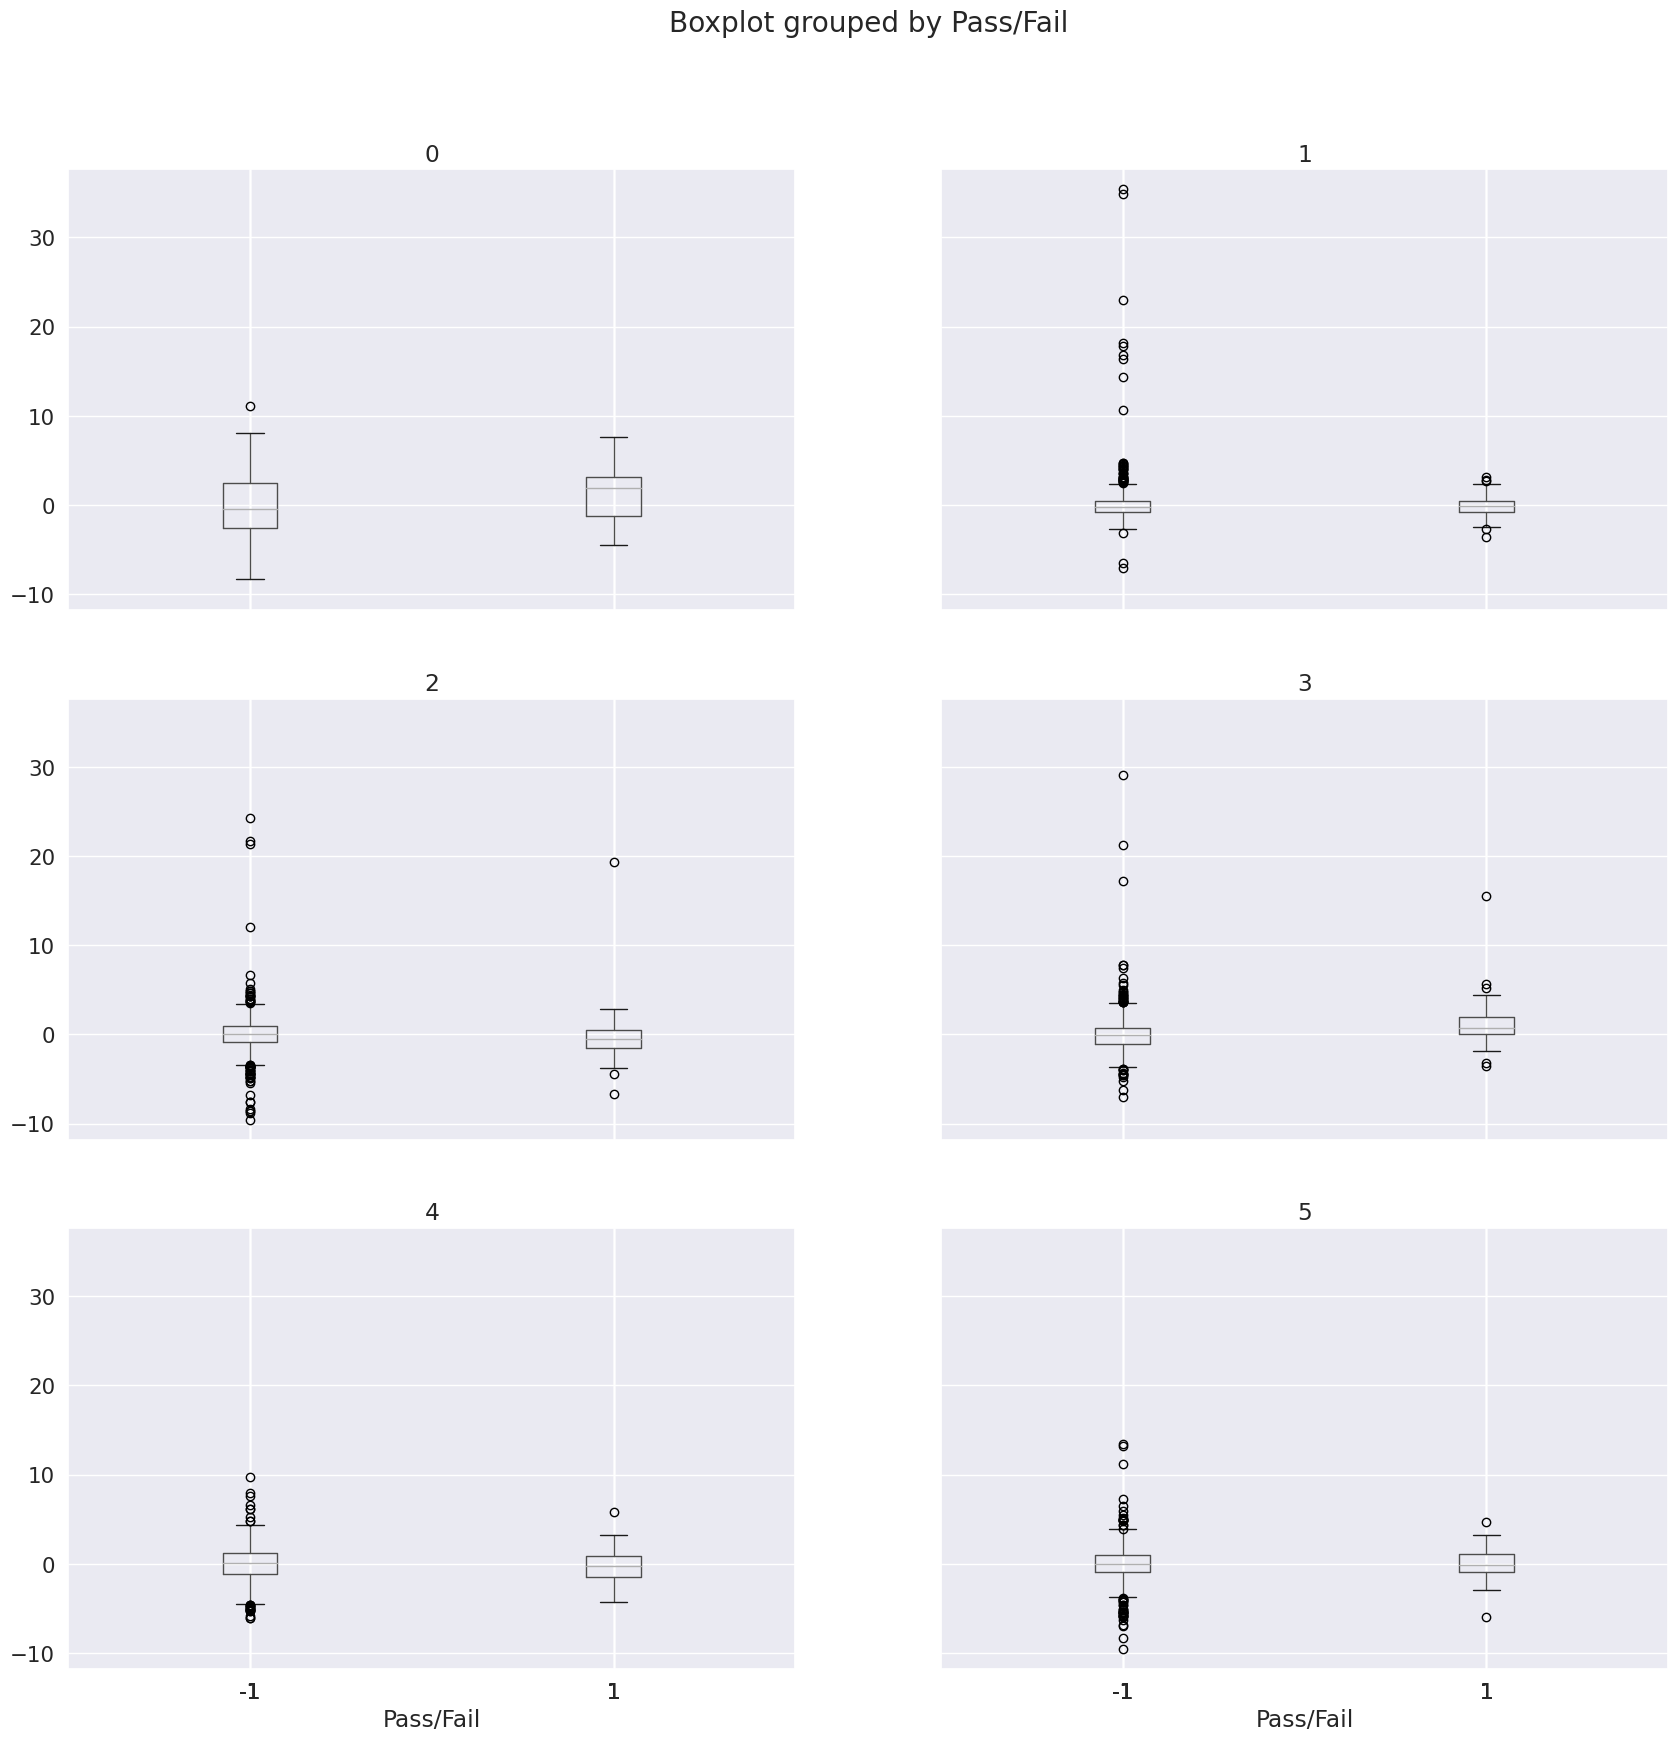

In [150]:
# 이상치 제거
df_red4.boxplot(column = [df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3],
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ]
                          , by = 'Pass/Fail', figsize=(20,20));

In [151]:
# 이상치 제거
pd_data = df_red4.copy()

from scipy import stats

def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])

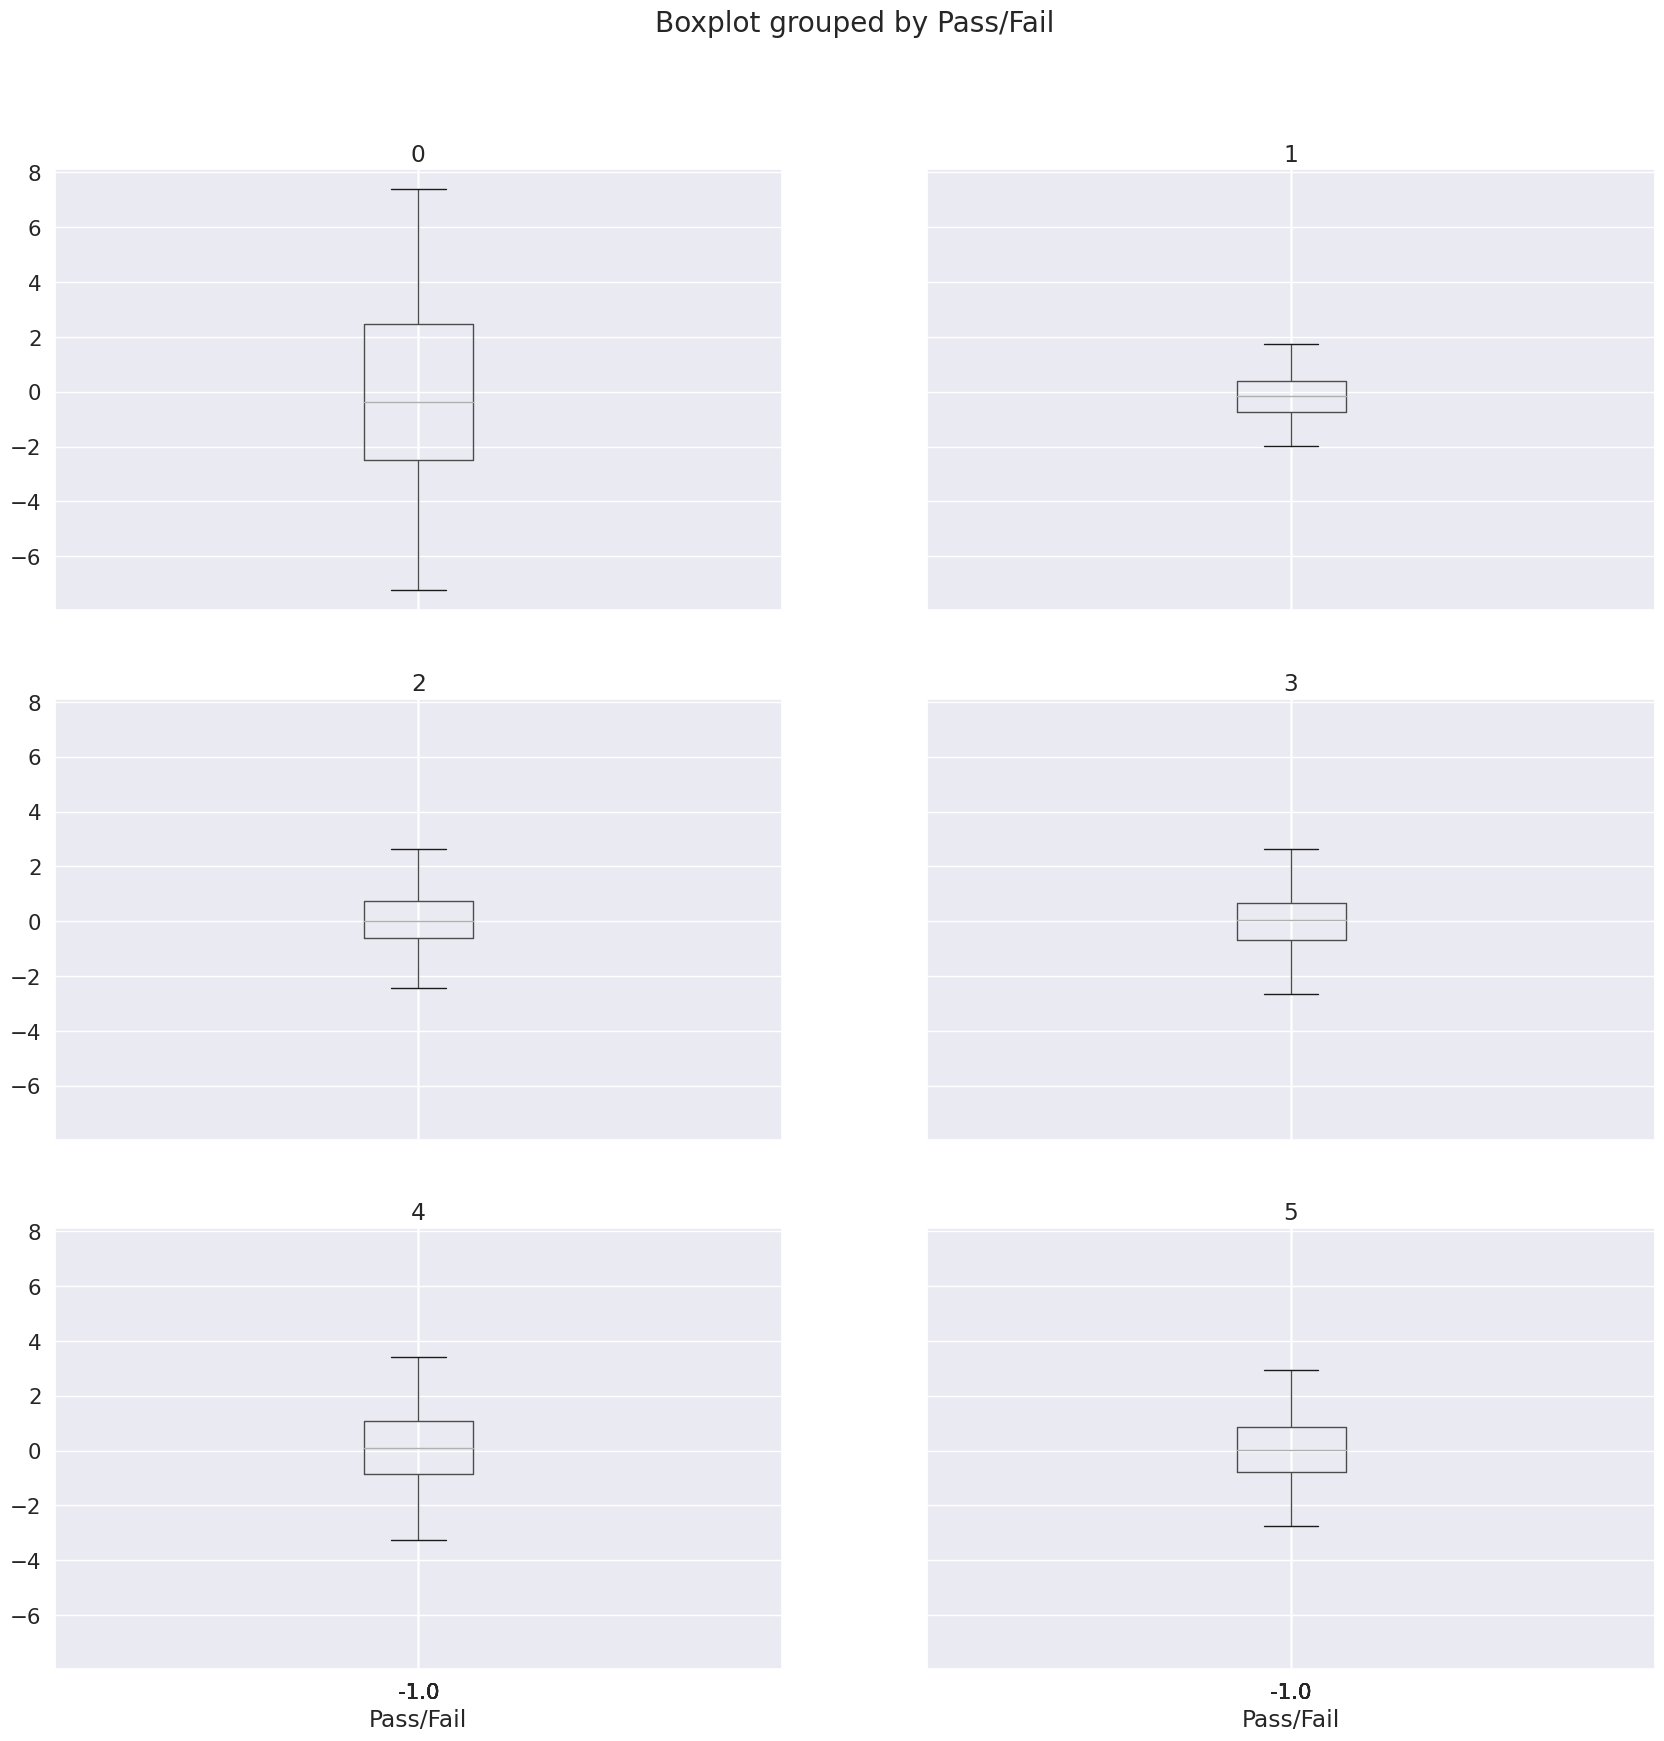

In [152]:
pd_data.boxplot( column =[df_red4.columns[0],
                          df_red4.columns[1],
                          df_red4.columns[2],
                          df_red4.columns[3],
                          df_red4.columns[4],
                          df_red4.columns[5],
                         ],by = 'Pass/Fail', figsize=(20,20));

## 3.6 PCA 후 Modeling

In [153]:
x = df_red4.iloc[:, df_red4.columns != 'Pass/Fail']
y = df_red4.iloc[:, df_red4.columns == 'Pass/Fail']

print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 130)
shape of y: (1567, 1)


In [154]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

under_sample = np.concatenate([failed_tests, random_normal_indices])

In [155]:
undersample_data = df_red4.iloc[under_sample, :]

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail']
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 130)
(208, 1)


In [157]:
y = y.replace(-1, 0)

In [158]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(145, 130)
(145, 1)
(63, 130)
(63, 1)


### 3.6.1 XGBoost

Accuracy:  61.904761904761905


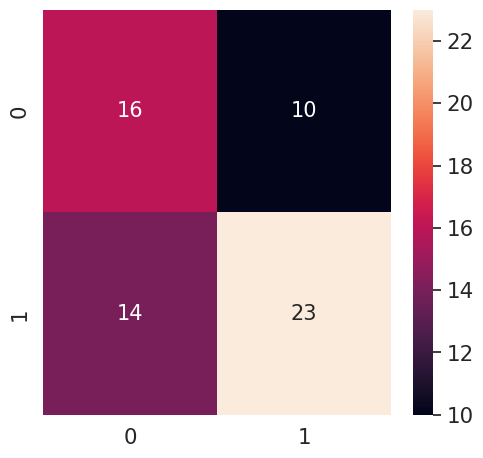

In [160]:
model = XGBClassifier(random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

cm = confusion_matrix(y_test_us, y_pred)

print("Accuracy: ", model.score(x_test_us,y_test_us)*100)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

In [161]:
# XGBoost Gridsearch
parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6],
              'learning_rate': [0.01, 0.1, 0.2],
               'min_child_weight': [1, 3, 5],
             'random_state' : [1]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy*100)
print("Best Parameter: ", best_parameters)

Best Accuracy:  71.72413793103448
Best Parameter:  {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'random_state': 1}


In [162]:
weights = (y == 0).sum()/(1.0*(y == 1).sum())

model = XGBClassifier(max_depth = 5, scale_pos_weights = weights, n_jobs = 4,random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

print("Accuracy: ", model.score(x_test_us,y_test_us)*100)

cm = confusion_matrix(y_test_us, y_pred)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15});

Accuracy:  61.904761904761905


### 3.6.2 RandomForest

Accuracy:  52.38095238095239


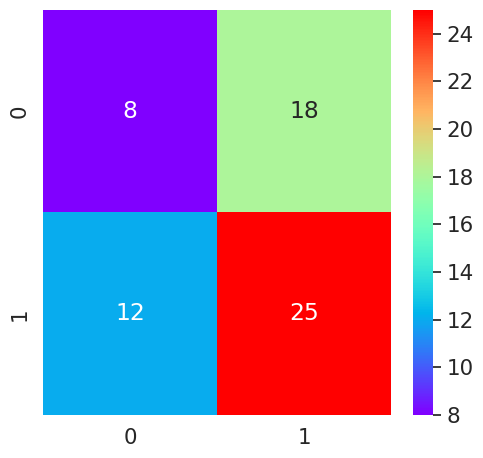

In [163]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)

print("Accuracy: ", model.score(x_test_us,y_test_us)*100)
cm = confusion_matrix(y_test_us, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow');

### 3.6.3 Logistic Regression

In [164]:
lr = LogisticRegression(random_state=1)
lr.fit(x_train_us, y_train_us)
y_pred = lr.predict(x_test_us)
y_pred = y_pred.reshape(-1)
print("Accuracy: ", lr.score(x_test_us,y_test_us)*100)

Accuracy:  65.07936507936508


### 3.6.4 Feature Importance

In [165]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train_us, y_train_us)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [166]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pio.renderers
pio.renderers.default = 'colab'
pio.renderers

trace = go.Scatter(
    y = model.feature_importances_,
    x = x_train_us.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = model.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = x_train_us.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')